In [171]:
import pandas as pd
import numpy as np

In [179]:
file=pd.read_csv("/content/ECDC_surveillance_data_West_Nile_virus_infection.csv")
file.head()

,HealthTopic,Population,Distribution,Unit,Time,RegionCode,RegionName,CategoryIndex,Category,Value
0,West Nile virus infection,All cases,Distribution by age,%,2008.0,AT,Austria,1.0,0-4,-
1,West Nile virus infection,All cases,Distribution by age,%,2008.0,AT,Austria,2.0,May-14,-
2,West Nile virus infection,All cases,Distribution by age,%,2008.0,AT,Austria,3.0,15-24,-
3,West Nile virus infection,All cases,Distribution by age,%,2008.0,AT,Austria,4.0,25-44,-
4,West Nile virus infection,All cases,Distribution by age,%,2008.0,AT,Austria,5.0,45-64,-


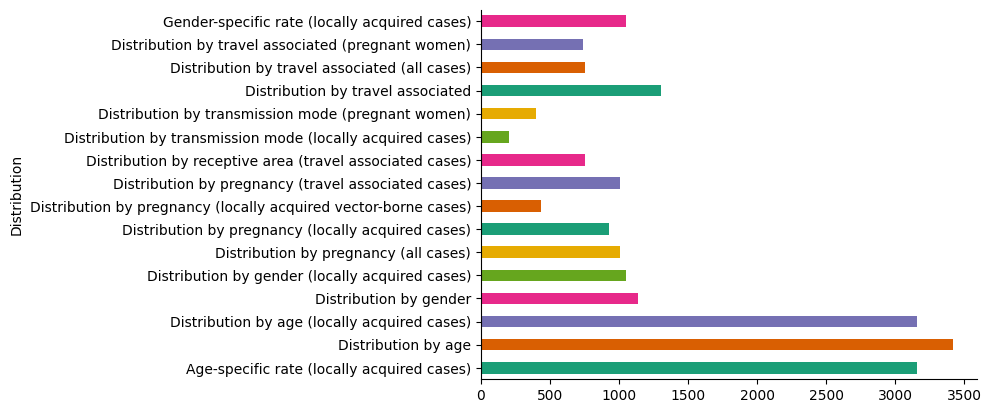

In [180]:
# @title Distribution

from matplotlib import pyplot as plt
import seaborn as sns
file.groupby('Distribution').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [181]:
file.tail()

,HealthTopic,Population,Distribution,Unit,Time,RegionCode,RegionName,CategoryIndex,Category,Value
20507,Zika virus infection,Reported cases,Distribution by travel associated (pregnant wo...,%,2023.0,SI,Slovenia,2.0,No,-
20508,Zika virus infection,Reported cases,Distribution by travel associated (pregnant wo...,%,2023.0,SI,Slovenia,3.0,Unknown,-
20509,Zika virus infection,Reported cases,Distribution by travel associated (pregnant wo...,%,2023.0,SK,Slovakia,1.0,Yes,-
20510,Zika virus infection,Reported cases,Distribution by travel associated (pregnant wo...,%,2023.0,SK,Slovakia,2.0,No,-
20511,Zika virus infection,Reported cases,Distribution by travel associated (pregnant wo...,%,2023.0,SK,Slovakia,3.0,Unknown,-


In [182]:
file.dtypes

,0
HealthTopic,object
Population,object
Distribution,object
Unit,object
Time,float64
RegionCode,object
RegionName,object
CategoryIndex,float64
Category,object
Value,object


In [183]:
file.isnull().sum()

,0
HealthTopic,1
Population,1
Distribution,1
Unit,1
Time,1
RegionCode,1
RegionName,1
CategoryIndex,1
Category,1
Value,1


In [184]:
file.drop(columns='CategoryIndex',axis=1,inplace=True)

In [185]:
file.columns

Index(['HealthTopic', 'Population', 'Distribution', 'Unit', 'Time',
       'RegionCode', 'RegionName', 'Category', 'Value'],
      dtype='object')

In [148]:
file.head()

,HealthTopic,Population,Distribution,Unit,Time,RegionCode,RegionName,Category,Value
0,West Nile virus infection,All cases,Distribution by age,%,2008.0,AT,Austria,0-4,-
1,West Nile virus infection,All cases,Distribution by age,%,2008.0,AT,Austria,May-14,-
2,West Nile virus infection,All cases,Distribution by age,%,2008.0,AT,Austria,15-24,-
3,West Nile virus infection,All cases,Distribution by age,%,2008.0,AT,Austria,25-44,-
4,West Nile virus infection,All cases,Distribution by age,%,2008.0,AT,Austria,45-64,-


In [149]:
file.shape

(20512, 9)

In [150]:
file.drop_duplicates(inplace=True)
file.shape

(20512, 9)

In [151]:
for i in file.columns:
  print(i,file[i].unique())

HealthTopic ['West Nile virus infection' nan 'Zika virus infection']
Population ['All cases' 'Locally acquired cases' nan 'Reported cases']
Distribution ['Distribution by age' 'Distribution by gender'
 'Distribution by travel associated'
 'Age-specific rate (locally acquired cases)'
 'Distribution by age (locally acquired cases)'
 'Distribution by gender (locally acquired cases)'
 'Gender-specific rate (locally acquired cases)' nan
 'Distribution by pregnancy (all cases)'
 'Distribution by pregnancy (locally acquired cases)'
 'Distribution by pregnancy (locally acquired vector-borne cases)'
 'Distribution by pregnancy (travel associated cases)'
 'Distribution by receptive area (travel associated cases)'
 'Distribution by transmission mode (locally acquired cases)'
 'Distribution by transmission mode (pregnant women)'
 'Distribution by travel associated (all cases)'
 'Distribution by travel associated (pregnant women)']
Unit ['%' 'N/100000' nan]
Time [2008. 2009. 2010. 2011. 2012. 2013.

In [152]:
file.dropna(how='any',inplace=True)

In [153]:
for i in file.columns:
  print(i,file[i].unique())

HealthTopic ['West Nile virus infection' 'Zika virus infection']
Population ['All cases' 'Locally acquired cases' 'Reported cases']
Distribution ['Distribution by age' 'Distribution by gender'
 'Distribution by travel associated'
 'Age-specific rate (locally acquired cases)'
 'Distribution by age (locally acquired cases)'
 'Distribution by gender (locally acquired cases)'
 'Gender-specific rate (locally acquired cases)'
 'Distribution by pregnancy (all cases)'
 'Distribution by pregnancy (locally acquired cases)'
 'Distribution by pregnancy (locally acquired vector-borne cases)'
 'Distribution by pregnancy (travel associated cases)'
 'Distribution by receptive area (travel associated cases)'
 'Distribution by transmission mode (locally acquired cases)'
 'Distribution by transmission mode (pregnant women)'
 'Distribution by travel associated (all cases)'
 'Distribution by travel associated (pregnant women)']
Unit ['%' 'N/100000']
Time [2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 201

In [154]:
import pandas as pd

# Replace 'May' with '5' only when it's followed by a hyphen and digits
file['Category'] = file['Category'].str.replace(r'^May-(\d+)$', r'5-\1', regex=True)
for i in file.columns:
  print(i,file[i].unique())

HealthTopic ['West Nile virus infection' 'Zika virus infection']
Population ['All cases' 'Locally acquired cases' 'Reported cases']
Distribution ['Distribution by age' 'Distribution by gender'
 'Distribution by travel associated'
 'Age-specific rate (locally acquired cases)'
 'Distribution by age (locally acquired cases)'
 'Distribution by gender (locally acquired cases)'
 'Gender-specific rate (locally acquired cases)'
 'Distribution by pregnancy (all cases)'
 'Distribution by pregnancy (locally acquired cases)'
 'Distribution by pregnancy (locally acquired vector-borne cases)'
 'Distribution by pregnancy (travel associated cases)'
 'Distribution by receptive area (travel associated cases)'
 'Distribution by transmission mode (locally acquired cases)'
 'Distribution by transmission mode (pregnant women)'
 'Distribution by travel associated (all cases)'
 'Distribution by travel associated (pregnant women)']
Unit ['%' 'N/100000']
Time [2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 201

In [155]:
file['Value'] = pd.to_numeric(file['Value'], errors='coerce')
for i in file.columns:
  print(i,file[i].unique())

HealthTopic ['West Nile virus infection' 'Zika virus infection']
Population ['All cases' 'Locally acquired cases' 'Reported cases']
Distribution ['Distribution by age' 'Distribution by gender'
 'Distribution by travel associated'
 'Age-specific rate (locally acquired cases)'
 'Distribution by age (locally acquired cases)'
 'Distribution by gender (locally acquired cases)'
 'Gender-specific rate (locally acquired cases)'
 'Distribution by pregnancy (all cases)'
 'Distribution by pregnancy (locally acquired cases)'
 'Distribution by pregnancy (locally acquired vector-borne cases)'
 'Distribution by pregnancy (travel associated cases)'
 'Distribution by receptive area (travel associated cases)'
 'Distribution by transmission mode (locally acquired cases)'
 'Distribution by transmission mode (pregnant women)'
 'Distribution by travel associated (all cases)'
 'Distribution by travel associated (pregnant women)']
Unit ['%' 'N/100000']
Time [2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 201

In [156]:
file.dropna()

,HealthTopic,Population,Distribution,Unit,Time,RegionCode,RegionName,Category,Value
48,West Nile virus infection,All cases,Distribution by age,%,2008.0,EU27_21,EU (without UK),0-4,0.000000
49,West Nile virus infection,All cases,Distribution by age,%,2008.0,EU27_21,EU (without UK),5-14,0.000000
50,West Nile virus infection,All cases,Distribution by age,%,2008.0,EU27_21,EU (without UK),15-24,12.500000
51,West Nile virus infection,All cases,Distribution by age,%,2008.0,EU27_21,EU (without UK),25-44,16.666666
52,West Nile virus infection,All cases,Distribution by age,%,2008.0,EU27_21,EU (without UK),45-64,37.500000
...,...,...,...,...,...,...,...,...,...
20450,Zika virus infection,Reported cases,Distribution by travel associated (pregnant wo...,%,2023.0,EUEEA30_21,EU/EEA (without UK),No,0.000000
20451,Zika virus infection,Reported cases,Distribution by travel associated (pregnant wo...,%,2023.0,EUEEA30_21,EU/EEA (without UK),Unknown,0.000000
20452,Zika virus infection,Reported cases,Distribution by travel associated (pregnant wo...,%,2023.0,EUEEAUK_21,EU/EEA (with UK until 2019),Yes,100.000000
20453,Zika virus infection,Reported cases,Distribution by travel associated (pregnant wo...,%,2023.0,EUEEAUK_21,EU/EEA (with UK until 2019),No,0.000000


In [157]:
# Step 1: Remove rows with '-' in 'Value'
import numpy as np
file = file[file['Value'] != '-']

# Step 2: Convert to numeric (float)
file['Value'] = pd.to_numeric(file['Value'], errors='coerce')

# Step 3: Drop rows with NaN or infinite values
file = file[file['Value'].notna() & file['Value'].apply(np.isfinite)]

# Step 4: Convert to integer safely
file['Value'] = file['Value'].astype(int)
for i in file.columns:
  print(i,file[i].unique())


HealthTopic ['West Nile virus infection' 'Zika virus infection']
Population ['All cases' 'Locally acquired cases' 'Reported cases']
Distribution ['Distribution by age' 'Distribution by gender'
 'Distribution by travel associated'
 'Age-specific rate (locally acquired cases)'
 'Distribution by age (locally acquired cases)'
 'Distribution by gender (locally acquired cases)'
 'Gender-specific rate (locally acquired cases)'
 'Distribution by pregnancy (all cases)'
 'Distribution by pregnancy (locally acquired cases)'
 'Distribution by pregnancy (locally acquired vector-borne cases)'
 'Distribution by pregnancy (travel associated cases)'
 'Distribution by receptive area (travel associated cases)'
 'Distribution by transmission mode (locally acquired cases)'
 'Distribution by transmission mode (pregnant women)'
 'Distribution by travel associated (all cases)'
 'Distribution by travel associated (pregnant women)']
Unit ['%' 'N/100000']
Time [2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 201

In [158]:
file.dtypes

,0
HealthTopic,object
Population,object
Distribution,object
Unit,object
Time,float64
RegionCode,object
RegionName,object
Category,object
Value,int64


In [159]:
file.head()

,HealthTopic,Population,Distribution,Unit,Time,RegionCode,RegionName,Category,Value
48,West Nile virus infection,All cases,Distribution by age,%,2008.0,EU27_21,EU (without UK),0-4,0
49,West Nile virus infection,All cases,Distribution by age,%,2008.0,EU27_21,EU (without UK),5-14,0
50,West Nile virus infection,All cases,Distribution by age,%,2008.0,EU27_21,EU (without UK),15-24,12
51,West Nile virus infection,All cases,Distribution by age,%,2008.0,EU27_21,EU (without UK),25-44,16
52,West Nile virus infection,All cases,Distribution by age,%,2008.0,EU27_21,EU (without UK),45-64,37


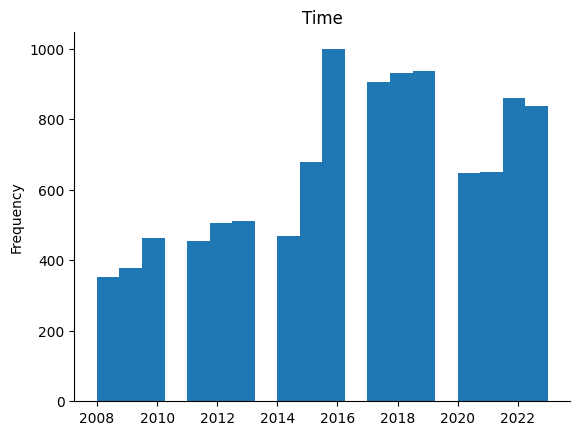

In [160]:
# @title Time

from matplotlib import pyplot as plt
file['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

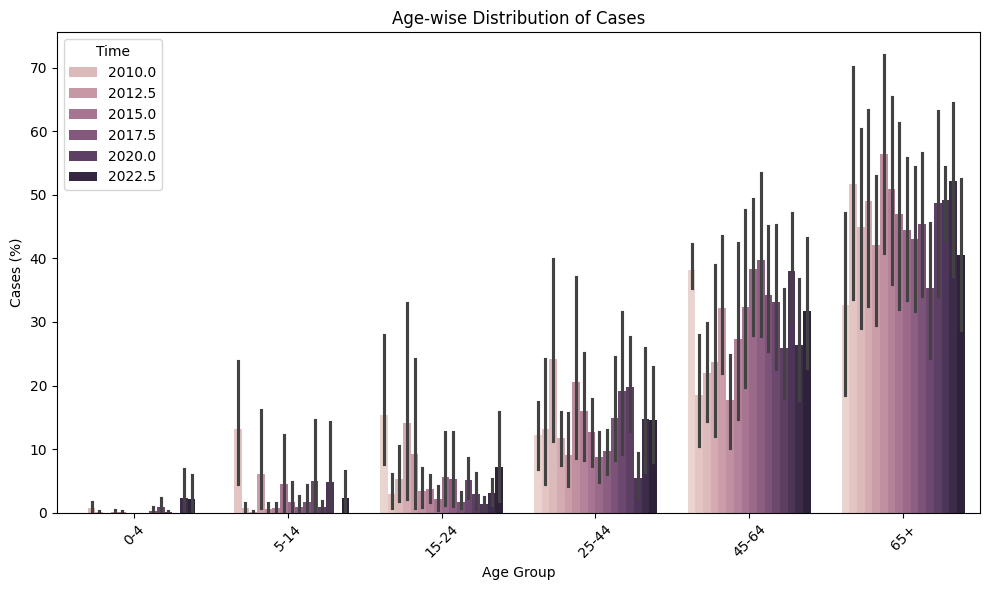

In [161]:
# Filter a specific year or overall distribution
age_data = file[file['Distribution'] == 'Distribution by age']

plt.figure(figsize=(10, 6))
sns.barplot(data=age_data, x='Category', y='Value', hue='Time')
plt.title('Age-wise Distribution of Cases')
plt.xlabel('Age Group')
plt.ylabel(f'Cases ({age_data["Unit"].iloc[0]})')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


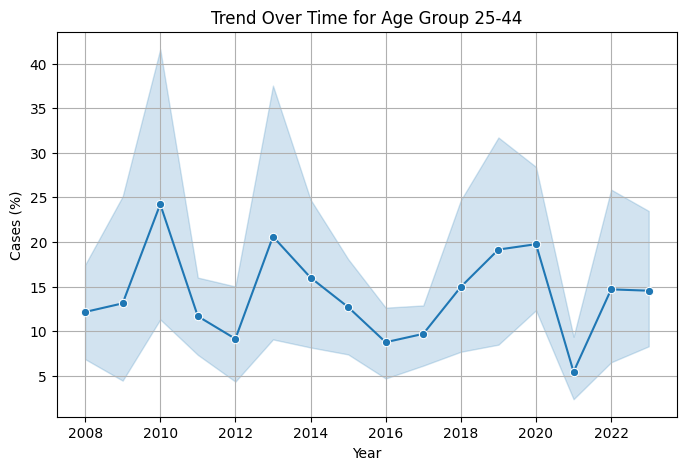

In [162]:
# Filter specific age group
trend_data = file[(file['Category'] == '25-44') & (file['Distribution'] == 'Distribution by age')]

plt.figure(figsize=(8, 5))
sns.lineplot(data=trend_data, x='Time', y='Value', marker='o')
plt.title('Trend Over Time for Age Group 25-44')
plt.xlabel('Year')
plt.ylabel(f'Cases ({trend_data["Unit"].iloc[0]})')
plt.grid(True)
plt.show()


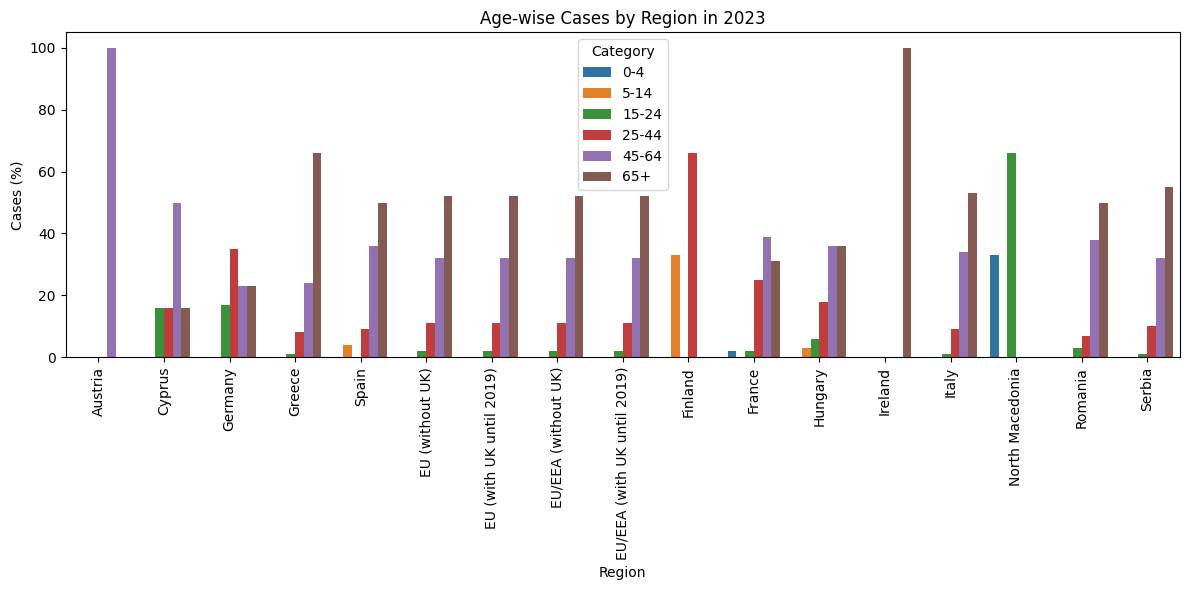

In [163]:
# Filter latest year (e.g., 2023)
latest_year = file['Time'].max()
region_data = file[(file['Time'] == latest_year) & (file['Distribution'] == 'Distribution by age')]

plt.figure(figsize=(12, 6))
sns.barplot(data=region_data, x='RegionName', y='Value', hue='Category')
plt.title(f'Age-wise Cases by Region in {int(latest_year)}')
plt.xlabel('Region')
plt.ylabel(f'Cases ({region_data["Unit"].iloc[0]})')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [164]:
file.shape

(10577, 9)

In [167]:
# Example: take 1 row for each unique combination of HealthTopic, RegionName, Category
small_sample = file.groupby(['HealthTopic', 'RegionName', 'Category']).apply(lambda x: x.sample(1)).reset_index(drop=True)
small_sample.to_csv("FINAL_DATA_TWO.csv")

/tmp/ipython-input-167-3454261077.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  small_sample = file.groupby(['HealthTopic', 'RegionName', 'Category']).apply(lambda x: x.sample(1)).reset_index(drop=True)


In [166]:
for i in file.columns:
  print(i,file[i].unique())


HealthTopic ['West Nile virus infection' 'Zika virus infection']
Population ['All cases' 'Locally acquired cases' 'Reported cases']
Distribution ['Distribution by age' 'Distribution by gender'
 'Distribution by travel associated'
 'Age-specific rate (locally acquired cases)'
 'Distribution by age (locally acquired cases)'
 'Distribution by gender (locally acquired cases)'
 'Gender-specific rate (locally acquired cases)'
 'Distribution by pregnancy (all cases)'
 'Distribution by pregnancy (locally acquired cases)'
 'Distribution by pregnancy (locally acquired vector-borne cases)'
 'Distribution by pregnancy (travel associated cases)'
 'Distribution by receptive area (travel associated cases)'
 'Distribution by transmission mode (locally acquired cases)'
 'Distribution by transmission mode (pregnant women)'
 'Distribution by travel associated (all cases)'
 'Distribution by travel associated (pregnant women)']
Unit ['%' 'N/100000']
Time [2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 201

/tmp/ipython-input-168-3416250632.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region_data =small_sample[(small_sample['Time'] == latest_year) & (file['Distribution'] == 'Distribution by age')]


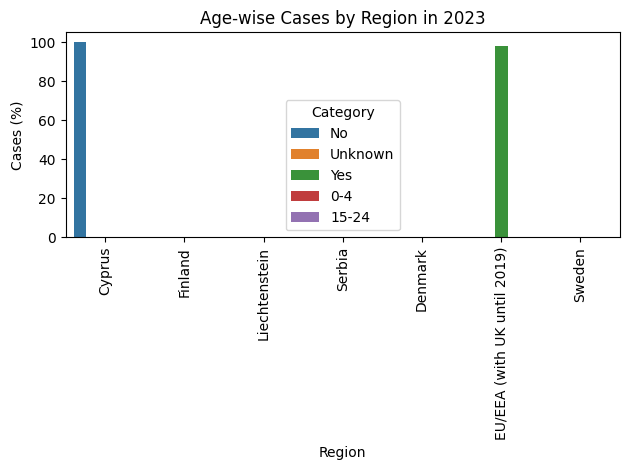

In [168]:
# Filter latest year (e.g., 2023)
latest_year = small_sample['Time'].max()
region_data =small_sample[(small_sample['Time'] == latest_year) & (file['Distribution'] == 'Distribution by age')]
sns.barplot(data=region_data, x='RegionName', y='Value', hue='Category')
plt.title(f'Age-wise Cases by Region in {int(latest_year)}')
plt.xlabel('Region')
plt.ylabel(f'Cases ({region_data["Unit"].iloc[0]})')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


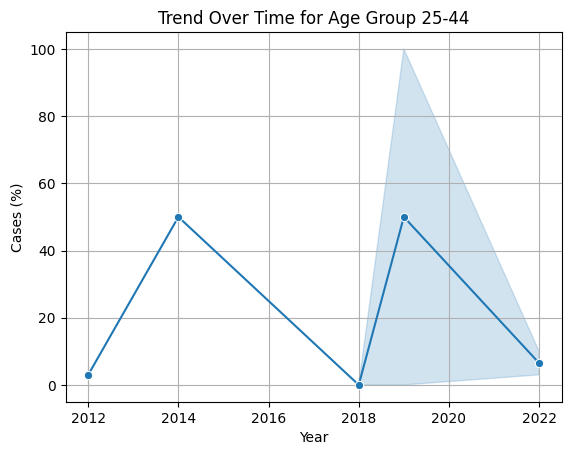

In [169]:
# Filter specific age group
trend_data =small_sample[(small_sample['Category'] == '25-44') & (small_sample['Distribution'] == 'Distribution by age')]
sns.lineplot(data=trend_data, x='Time', y='Value', marker='o')
plt.title('Trend Over Time for Age Group 25-44')
plt.xlabel('Year')
plt.ylabel(f'Cases ({trend_data["Unit"].iloc[0]})')
plt.grid(True)
plt.show()
